In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from sklearn.cluster import \
     (KMeans,
      AgglomerativeClustering)
from scipy.cluster.hierarchy import \
     (dendrogram,
      cut_tree)
from ISLP.cluster import compute_linkage

### Testing

In [34]:
phishingurl_data = pd.read_csv("C:\\Users\\david\\Downloads\\phiusiil+phishing+url+dataset\\PhiUSIIL_Phishing_URL_Dataset.csv")

In [36]:
phishingurl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [37]:
url_df = phishingurl_data.sample(10000, random_state=13)

In [39]:
# Drop non-numeric values and true / false values
X = url_df.drop(['FILENAME', 'URL', 'Domain', 'TLD', 'Title', 'HasObfuscation', 'IsDomainIP', 'HasTitle', 'HasFavicon', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'HasCopyrightInfo', 'label'],axis = 1)

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [41]:
kmeans = KMeans(n_clusters=2,
                random_state=2,
                n_init=20).fit(X_scaled)

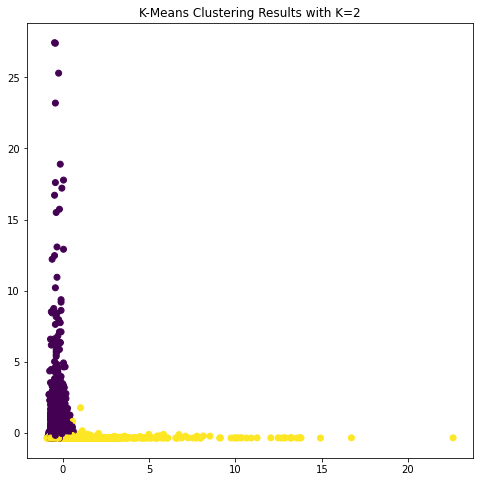

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(X_scaled['NoOfLettersInURL'], X_scaled['NoOfImage'], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=2");

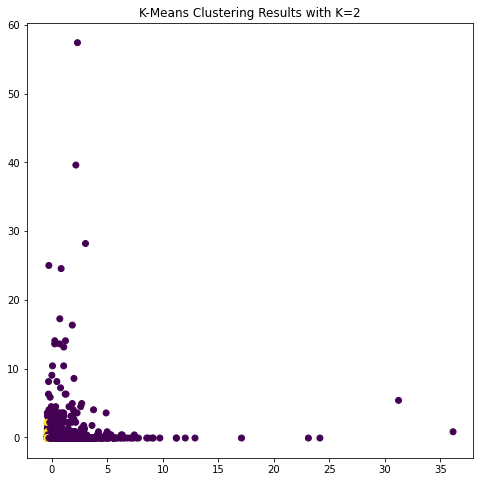

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(X_scaled['NoOfExternalRef'], X_scaled['NoOfPopup'], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=2");

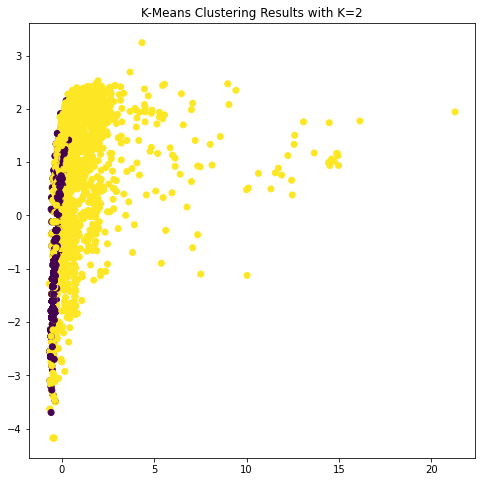

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(X_scaled['URLLength'], X_scaled['LetterRatioInURL'], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=2");